In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


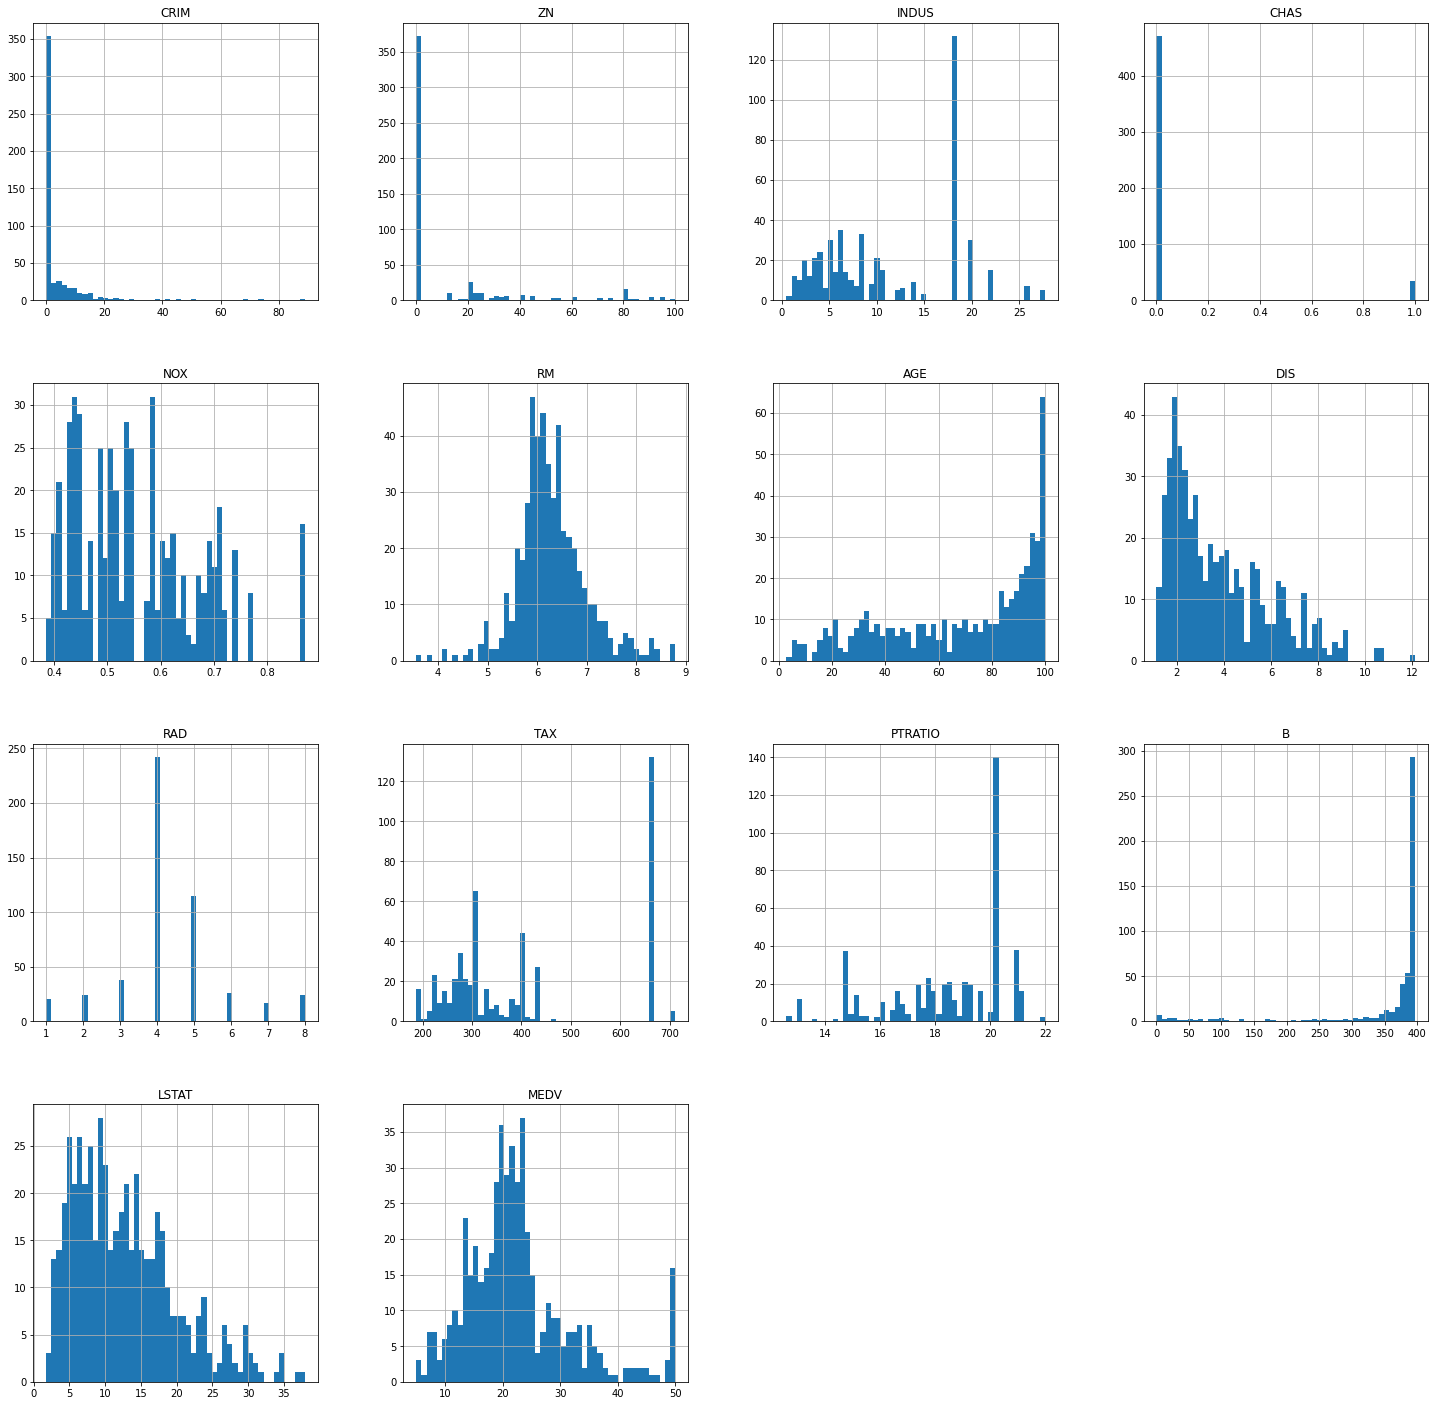

In [7]:
housing.hist(bins=50, figsize=(25,25))
plt.show()

# Train-Test Splitting

In [8]:
'''def split_train_test(data, test_ratio):
    np.random.seed(42)
    # np.random.permutation() returns a shuffled array
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    #print(test_set_size)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    
    # iloc is for indexing
    return data.iloc[train_indices], data.iloc[test_indices]
'''    
#train_set, test_set = split_train_test(housing, 0.2)

'def split_train_test(data, test_ratio):\n    np.random.seed(42)\n    # np.random.permutation() returns a shuffled array\n    shuffled = np.random.permutation(len(data))\n    test_set_size = int(len(data)*test_ratio)\n    #print(test_set_size)\n    test_indices = shuffled[:test_set_size]\n    train_indices = shuffled[test_set_size:]\n    \n    # iloc is for indexing\n    return data.iloc[train_indices], data.iloc[test_indices]\n'

In [14]:
#train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [15]:
print("Rows in train set: %d\nRows in test set: %d"%(len(train_set),len(test_set)))

Rows in train set: 404
Rows in test set: 102
